## PROJECT SCOPE AND AIM

1.	To Understand Customer better

2.	Make operations run more efficiently

3.	Make customer experience even better

### AIM
1.	To better understand how people view our customer experience

#### To Do:
1.	Collect some data by scraping the web for customer reviews about BA

2.	Conduct some analysis.

3.	And present your findings

In [1]:
#Loading the Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set (stopwords.words('english'))
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
'''# extracting the data from the web
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 5
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")'''

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3806 total reviews
Scraping page 5
   ---> 3806 total reviews


In [3]:
'''# creating dataframe
df = pd.DataFrame()
df["reviews"] = reviews'''

In [4]:
'''#save the dataframe to csv file
df.to_csv("BA_reviews.csv")'''

In [2]:
# Reading the data
df = pd.read_csv("BA_reviews.csv")

In [3]:
#shape... dimension 
df.shape

(3806, 2)

In [4]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3806 non-null   int64 
 1   reviews     3806 non-null   object
dtypes: int64(1), object(1)
memory usage: 59.6+ KB


In [5]:
#is there not values
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [6]:
#columns
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [7]:
#Creating a new dataframe and dropping the unnamed columns
review_df = df.drop(['Unnamed: 0'], axis = 1)
review_df.head()

,reviews
0,✅ Trip Verified | My partner and I were on the...
1,Not Verified | We had a Premium Economy retur...
2,✅ Trip Verified | I should like to review my ...
3,✅ Trip Verified | We have flown with British A...
4,✅ Trip Verified | I sat in the plane at Vienna...


In [8]:
# Analyzing some reviews
print(review_df['reviews'].iloc[0],'\n')
print(review_df['reviews'].iloc[1],'\n')
print(review_df['reviews'].iloc[2],'\n')
print(review_df['reviews'].iloc[3],'\n')
print(review_df['reviews'].iloc[4],'\n')

✅ Trip Verified | My partner and I were on the BA2166 return flight from Tampa to Gatwick and I was very excited as had paid for a upgrade to Business Class, my partner flies BC with BA a lot for work but this was only my second time, we decided as it was the end of our holiday that have this will help us get some quality sleep. Unfortunately that was not to be. Also in Business Class were two families with children under 5. It was a very long flight listening to a toddler not just crying but screaming for seven out of the eight hours. Now its not the childrens fault, I do however think that the cabin crew could have maybe internvene and helped a little more but also BA should have informed us as we paid alot of money and quite frankly could have saved that money and just had economy ticket as at least we would be a few grand better off. What with that and how the checking in ground staff were treating us as if we were an inconvenience we will rethink BA moving forward. 

Not Verified 

In [9]:
#information of data
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3806 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [9]:
#Data Preprocessing, this stage the data is cleaned by removing all
# irrelevant word
review_df['reviews'] = review_df['reviews'].str.strip('✅ Trip Verified |')
review_df['reviews'] = review_df['reviews'].str.strip('Not Verified |')
    
    

In [10]:
#create a function to clean the data.
# creating a function that convert all text to lower, tokenzied the word, create stop words
#and remove all punctuations

def data_preprocessing(reviews):
    reviews = reviews.lower()
    reviews = re.sub('[^A-Za-z]+', ' ', str(reviews))
    reviews = re.sub(r"https\S+|www\S+https\S+", '',reviews, flags=re.MULTILINE)
    reviews = re.sub(r'\@w+\#,.''"()"','',reviews)
    reviews_tokens = word_tokenize(reviews)
    filtered_reviews = [w for w in reviews_tokens if not w in stop_words]
    return " ".join(filtered_reviews)

# removing all punctuation
def removingpunct(reviews):
    for punct in string.punctuation:
        reviews = reviews.replace(punct, '')
    return reviews

In [11]:
review_df.reviews = review_df['reviews'].apply(data_preprocessing)

In [12]:
#removing duplicated reviews
review_df = review_df.drop_duplicates('reviews')
review_df.shape

(3804, 1)

In [13]:
# stemization. convert words to the rooted words
stemmer = PorterStemmer()
def stemming(data):
    reviews = [stemmer.stem(word) for word in data]
    return data

In [14]:
review_df['reviews'] = review_df['reviews'].apply(lambda x: stemming(x))

In [15]:
review_df.head()

,reviews
0,partner ba return flight tampa gatwick excited...
1,premium economy return flight los angeles lond...
2,like review flight british airways hannover lo...
3,flown british airways times last trip far wors...
4,sat plane vienna airport three hours take arri...


In [17]:
'''# Analyzing some reviews
print(review_df['reviews'].iloc[0],'\n')
print(review_df['reviews'].iloc[1],'\n')
print(review_df['reviews'].iloc[2],'\n')
print(review_df['reviews'].iloc[3],'\n')
print(review_df['reviews'].iloc[4],'\n')'''



"# Analyzing some reviews\nprint(review_df['reviews'].iloc[0],'\n')\nprint(review_df['reviews'].iloc[1],'\n')\nprint(review_df['reviews'].iloc[2],'\n')\nprint(review_df['reviews'].iloc[3],'\n')\nprint(review_df['reviews'].iloc[4],'\n')"

### Sentiment Analysis Via Polarity Score

In [16]:
# creating a function to calculate the polarity of the data using textblob
def polarity(reviews):
    return TextBlob(reviews).sentiment.polarity

In [17]:
#applying the function to the reviews
review_df['polarity'] = review_df['reviews'].apply(polarity)

In [18]:
review_df.head(10)

,reviews,polarity
0,partner ba return flight tampa gatwick excited...,0.015278
1,premium economy return flight los angeles lond...,-0.058896
2,like review flight british airways hannover lo...,0.226548
3,flown british airways times last trip far wors...,-0.048925
4,sat plane vienna airport three hours take arri...,-0.025000
5,almost pm supposed take still sitting plane ai...,-0.291667
6,booked long haul flight singapore british airw...,0.115625
7,premium price sub par product flew ba lhr hkg ...,-0.107937
8,really terrible user experience british airway...,-0.193750
9,impressed ba check online little convoluted ev...,0.316865


In [19]:
#function to specified the sentiment of Customers based on polarity score
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label >0:
        return "Positive"

In [20]:
review_df['sentiment'] = review_df['polarity'].apply(sentiment)

In [21]:
review_df.head()

,reviews,polarity,sentiment
0,partner ba return flight tampa gatwick excited...,0.015278,Positive
1,premium economy return flight los angeles lond...,-0.058896,Negative
2,like review flight british airways hannover lo...,0.226548,Positive
3,flown british airways times last trip far wors...,-0.048925,Negative
4,sat plane vienna airport three hours take arri...,-0.025000,Negative


In [22]:
#counting the number of each sentiment 
review_df.sentiment.value_counts()

sentiment
Positive    2665
Negative    1112
Neutral       27
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

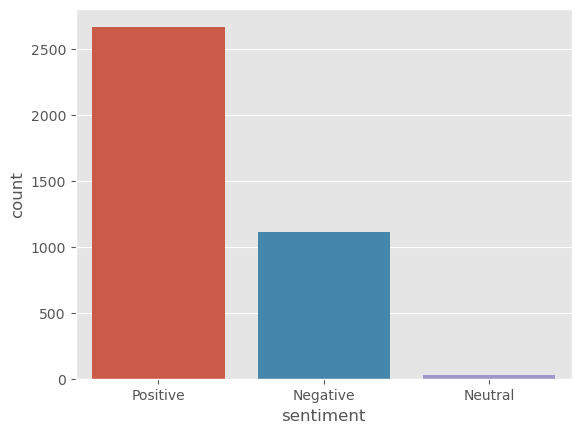

In [23]:
#Visualizing the sentiments
sns.countplot(x='sentiment', data = review_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

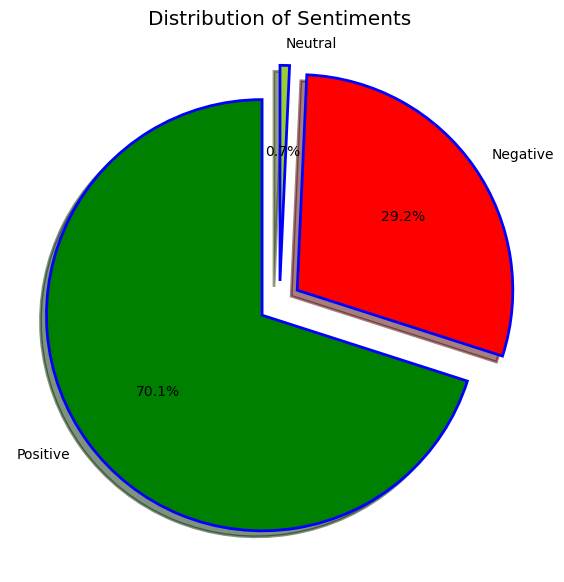

In [24]:
#Distribution of the sentiment using piechart
fig = plt.figure(figsize = (7,7))
colors = ('green', 'red', 'yellowgreen')
wp = {'linewidth':2, 'edgecolor':'blue'}
tags = review_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of Sentiments')

In [25]:
# obtaining the postive sentiments
pos_reviews = review_df[review_df.sentiment == 'Positive']
pos_reviews = pos_reviews.sort_values(['polarity'], ascending=False)
pos_reviews.head()

,reviews,polarity,sentiment
3454,impressed premium economy ba sydney heathrow r...,0.800000,Positive
440,hour min flight given bag potato chips bottle ...,0.800000,Positive
3660,flew ba heathrow hong kong first class seated ...,0.725000,Positive
886,edinburgh kuala lumpur via london returned kl ...,0.716667,Positive
3744,flew apr belfast changing heathrow also may th...,0.700000,Positive


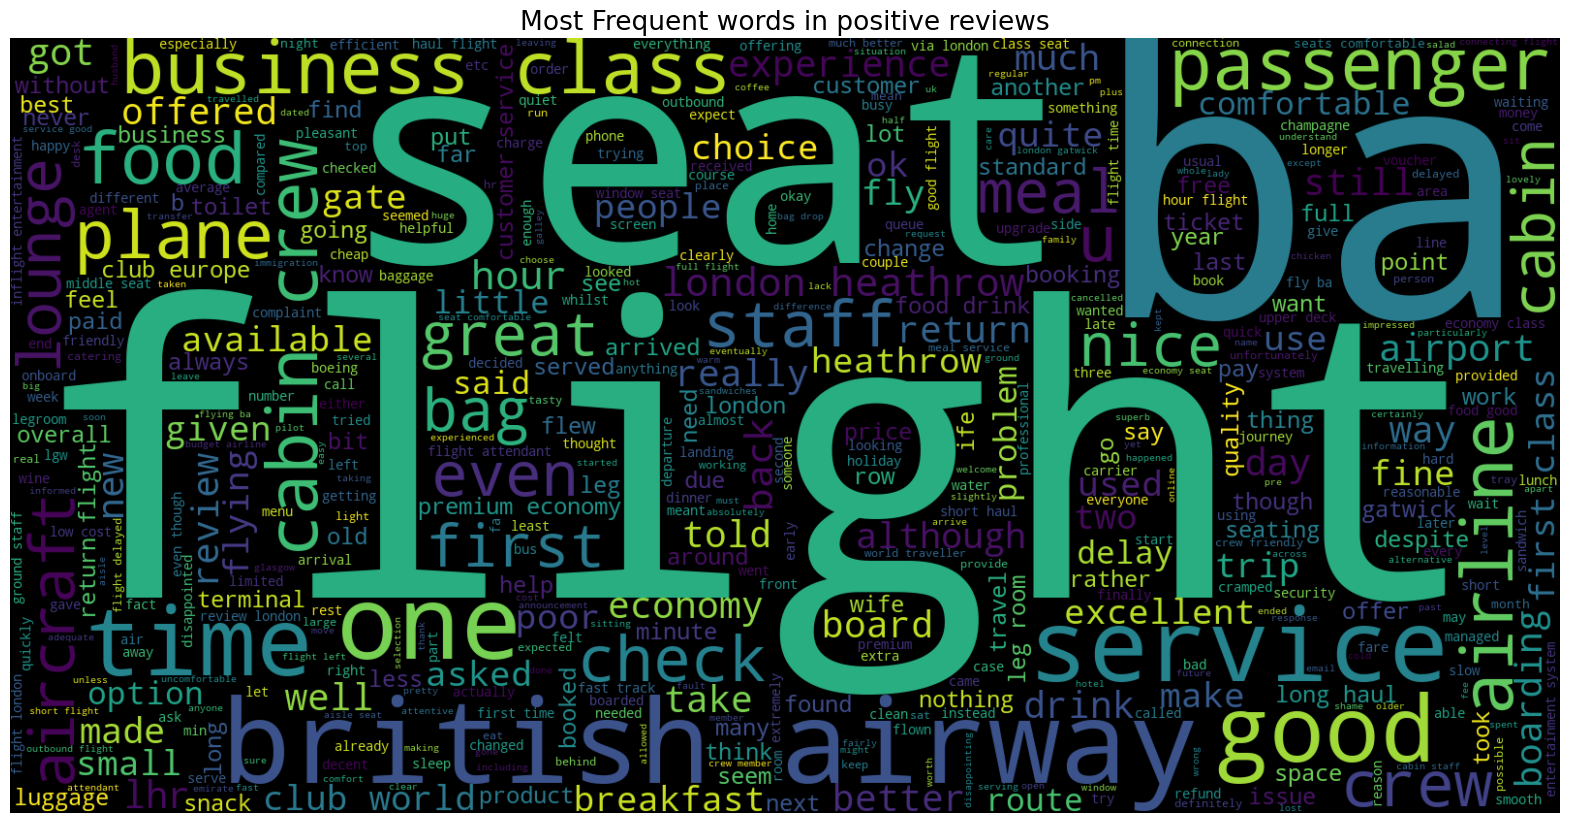

In [26]:
#visualized the most used words from positve reviews
review = ' '.join([word for word in pos_reviews['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in positive reviews', fontsize=19)
plt.show()

In [27]:
# obtaining the negative sentiments
neg_reviews = review_df[review_df.sentiment == 'Negative']
neg_reviews = neg_reviews.sort_values(['polarity'], ascending=False)
neg_reviews.head()

,reviews,polarity,sentiment
2469,london heathrow moscow flying moscow british a...,-6.938894e-18,Negative
1950,review aberdeen paris via london heathrow brit...,-6.938894e-18,Negative
203,sure ba gradually made economy experience ba e...,-1.306145e-17,Negative
1355,fort lauderdale gatwick efficient courtesy bus...,-1.632681e-17,Negative
870,hong kong london email th august advising us f...,-1.831502e-04,Negative


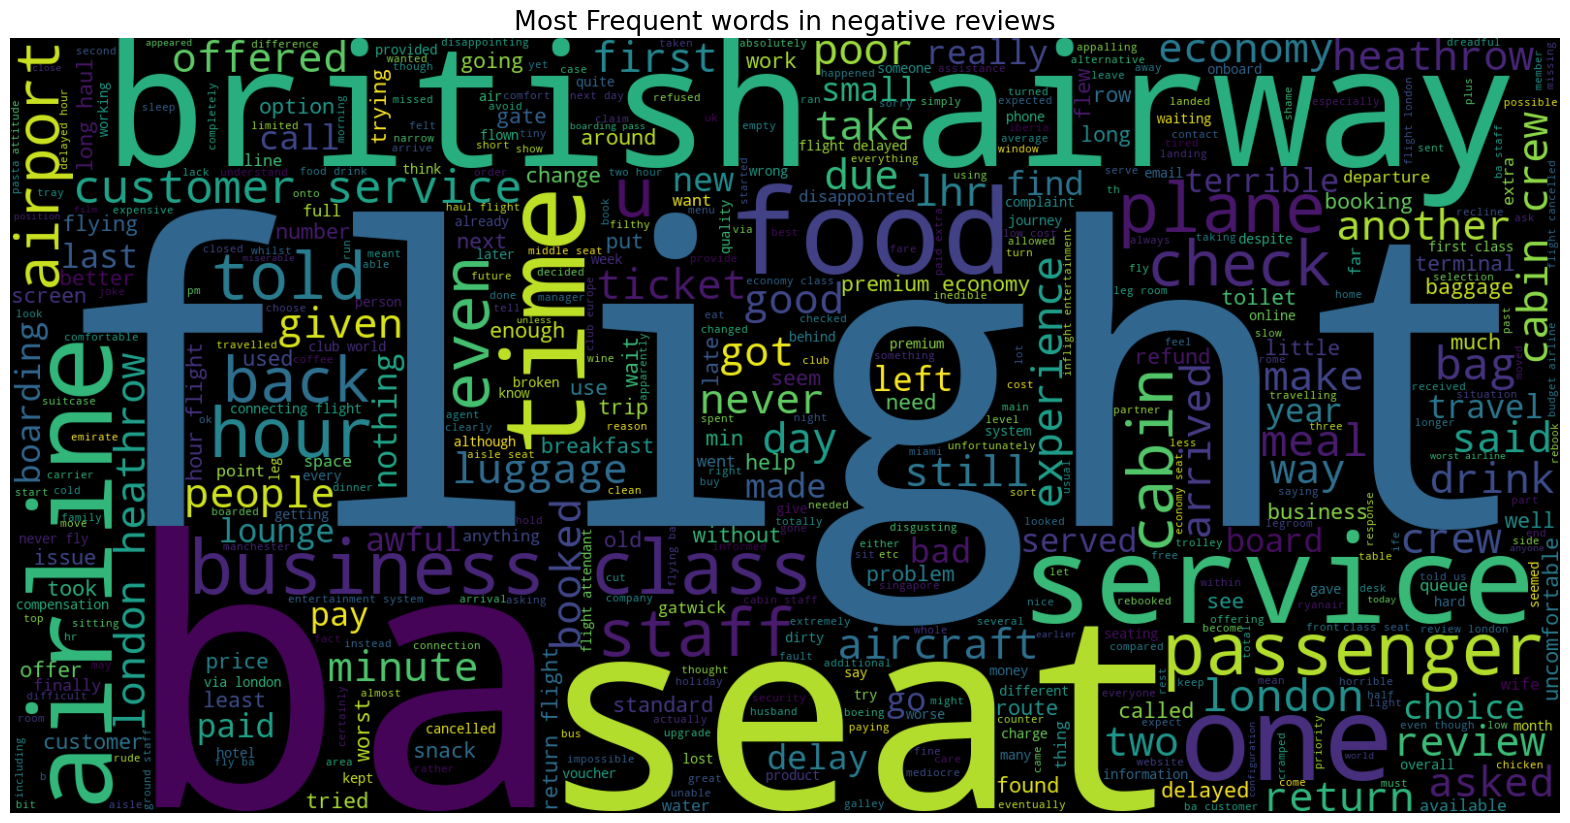

In [28]:
#visualized the most used words from negative reviews
review = ' '.join([word for word in neg_reviews['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in negative reviews', fontsize=19)
plt.show()

# Negative Reviews To look @
Seat, Spaces, Business Class,poor services, queue, return flight,food and drinks,waiting time, delayed flight, return tickets, refund, staff, cabin crew,  

In [29]:
# obtaining the neutral sentiments
neu_reviews = review_df[review_df.sentiment == 'Neutral']
neu_reviews = neu_reviews.sort_values(['polarity'], ascending=False)
neu_reviews.head()

,reviews,polarity,sentiment
35,flight comfortable enough hour delay return le...,0.0,Neutral
871,gatwick seville son girlfriend proceeded drop ...,0.0,Neutral
3527,orlando florida mco london gatwick lgw wed aug...,0.0,Neutral
3209,took flight gatwick barcelona although ba flig...,0.0,Neutral
2881,problems short flight left arrived time drink ...,0.0,Neutral


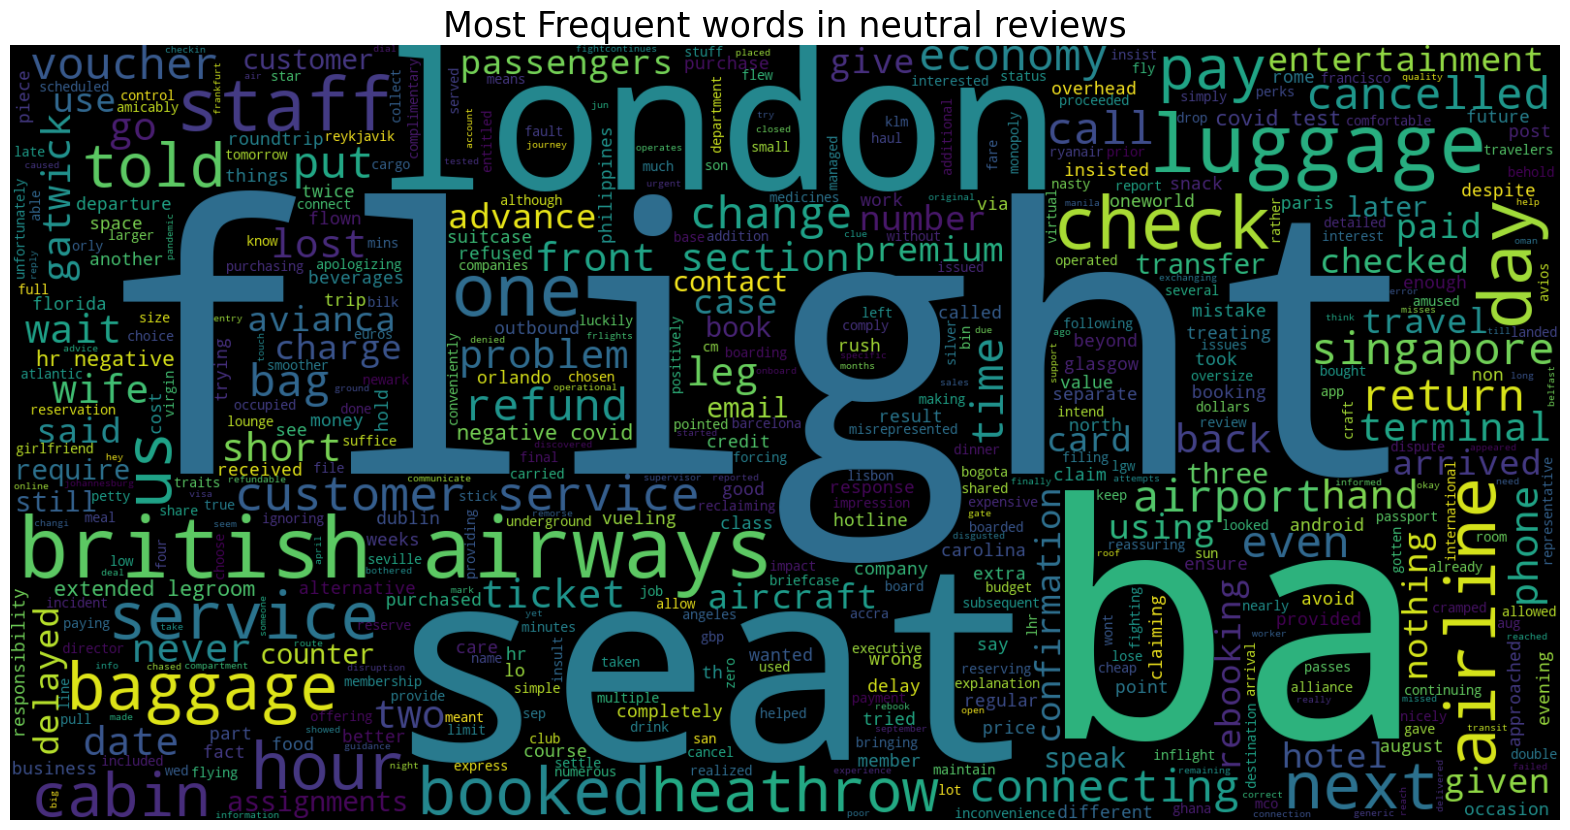

In [30]:
#visualized the most used words from neutral reviews
review = ' '.join([word for word in neu_reviews['reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in neutral reviews', fontsize=25)
plt.show()

In [31]:
# Ngram Vectorizer of word in features
vect = CountVectorizer(ngram_range=(1,2)).fit(review_df['reviews'])

In [32]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n {}'.format(feature_names[:20]))

Number of features: 201020

First 20 features:
 ['aa' 'aa admirals' 'aa aer' 'aa airlines' 'aa arrivals' 'aa awful'
 'aa better' 'aa bit' 'aa business' 'aa came' 'aa check' 'aa codeshare'
 'aa cx' 'aa delta' 'aa even' 'aa ever' 'aa exec' 'aa executive' 'aa flew'
 'aa flight']


In [33]:
#Building Models
# separating the data to train and test
X= review_df['reviews']
Y = review_df['sentiment']
#transforming the data using Vect
X = vect.transform(X)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [35]:
print('Size of x_train:', (x_train.shape))
print('Size of x_test:', (x_test.shape))
print('Size of y_train:', (y_train.shape))
print('Size of y_test:', (y_test.shape))

Size of x_train: (3043, 201020)
Size of x_test: (761, 201020)
Size of y_train: (3043,)
Size of y_test: (761,)


In [37]:
# Evaluate Algorithm: Model
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [36]:
#libraries needed for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [45]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [46]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.853768 (0.018266)
KNN: 0.644118 (0.032406)
CART: 0.771279 (0.023381)
SVM: 0.704234 (0.021060)


from the result it is seen that Logistic regression performed well with less running time.

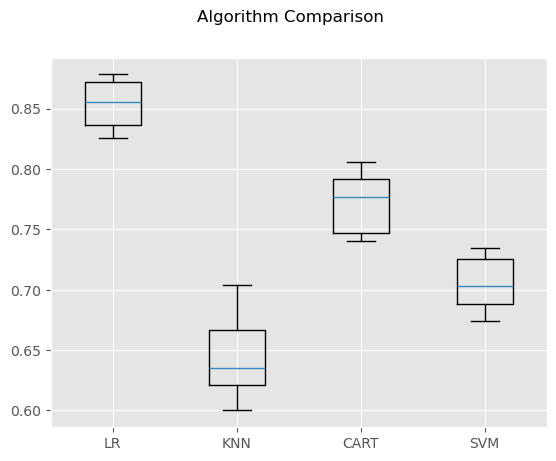

In [47]:
# Compare Algorithms the performance of algorithm graphically using box and whisker
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Tuning the best Model from the groups of model
For this Logistic Regression performed best

In [50]:
#tuning LR model because it gave the best result
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
model = LogisticRegression(solver='liblinear')
kfold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846529 using {'C': 10}
0.712784 (0.017572) with: {'C': 0.001}
0.818920 (0.023704) with: {'C': 0.01}
0.846527 (0.019450) with: {'C': 0.1}
0.846524 (0.019638) with: {'C': 1}
0.846529 (0.017739) with: {'C': 10}


We can see that the optimal configuration is C=10. 

This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

### Finalized Model

In [54]:
# Seeing that the Logistic Regression with the solver='liblinear' gives the best prediction
#we will be using just that to fit the model.
# prepare the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8396846254927727
[[156   0  74]
 [  4   0   5]
 [ 39   0 483]]
              precision    recall  f1-score   support

    Negative       0.78      0.68      0.73       230
     Neutral       0.00      0.00      0.00         9
    Positive       0.86      0.93      0.89       522

    accuracy                           0.84       761
   macro avg       0.55      0.53      0.54       761
weighted avg       0.83      0.84      0.83       761



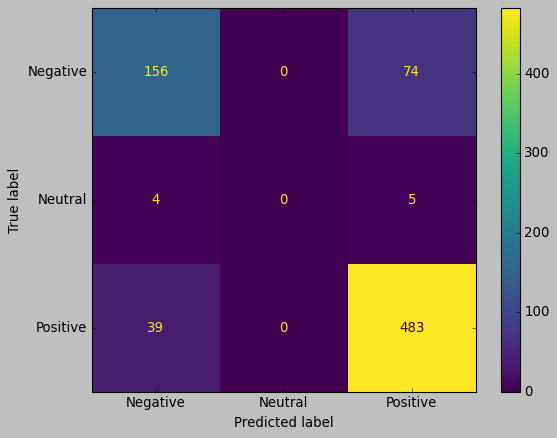

In [56]:
style.use('classic')
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#### In Conclusion

From the model design, Logistics regression performed best.

From the Negative word cloud the following should be looked at, by the managerial team
to help improve customer experience on the plane:

Seat Spaces; 

Business Class services; 

queue; 

return flight process;

food and drinks;

waiting time; 

delayed flight; 

return tickets; 

refund process; 

staffs and cabin crew should be given training.